# Hello Boston Housing Price Regressor

Predict the median price of homes in a given Boston suburb.

In [1]:
# Prerequisites
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers

### Get data from Boston Dataset

In [2]:
from tensorflow.keras.datasets import boston_housing

# Load the dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
print(f"training data shape: {train_data.shape}, test data shape {test_data.shape}")
print(f"training targets shape: {train_targets.shape}, test targets shape {test_targets.shape}")

training data shape: (404, 13), test data shape (102, 13)
training targets shape: (404,), test targets shape (102,)


In [4]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

### Prepare Data

Features have different scales, normalize the data for 0 mean and unit standard deviation

In [5]:
mean = np.mean(train_data, axis=0)
train_data -= mean
std = np.std(train_data, axis=0)
train_data /= std

test_data -= mean
test_data /= std

Note that the quantities used for normalizing the test data are computed using the training data!!!

### Build the ANN Model with Keras

In [6]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])

    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

    return model

### Validate model

Because the dataset is so small, let's use K-fold validation

In [7]:
k = 4  # k for K-fold validation 
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]],axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Check the validation results 

In [12]:
print("K-fold validation results: ", [f"{num:.3f}" for num in all_scores])
print("Mean of validation scores: ", round(np.mean(all_scores),3))

K-fold validation results:  ['2.190', '2.395', '2.464', '2.477']
Mean of validation scores:  2.381


Save the per epoch validation scores for each folds

In [13]:
k = 4  # k for K-fold validation 
num_val_samples = len(train_data) // k
num_epochs = 300
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Compute the average of the per-epoch MAE scores for all folds

In [14]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Plot

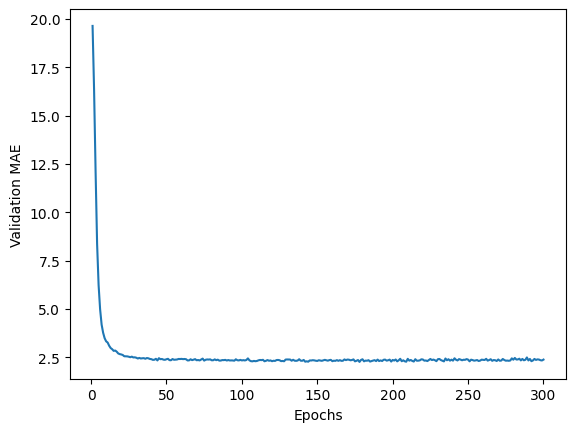

In [15]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Omit the first 10 data points (different scale) and re-plot

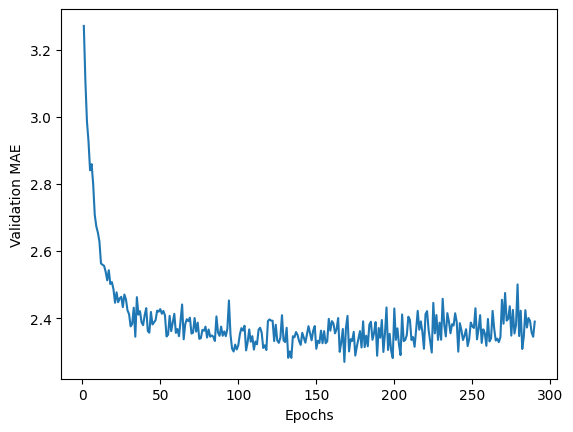

In [16]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Validation MAE stops improving after ~100 epochs

### Train model and test with test set

In [18]:
model = build_model()
model.fit(train_data, train_targets, epochs=120, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(f"Test MSE: {test_mse_score}, test MAE: {test_mae_score}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8561 - mae: 2.1841 
Test MSE: 13.652291297912598, test MAE: 2.398530960083008


### Predictions

In [19]:
predictions = model.predict(test_data)
print("First Prediction: ", predictions[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
First Prediction:  [8.431]
